In [1]:
import os
import pandas as pd
from cymr import models
from cymr import network
from cfr import framework
from psifr import fr

model_dir = '/Users/morton/Dropbox/work/cmr_cfr/cfr'
data_file = os.path.join(model_dir, 'benchmark.csv')
patterns_file = os.path.join(model_dir, 'cfr_patterns.hdf5')

In [2]:
data = pd.read_csv(data_file)

## Generate simulated data

In [3]:
param = {'Afc': 0, 'Acf': 0, 'Aff': 0, 'Dff': 2, 
         'Lfc': .16, 'Lcf': .08, 'P1': .14, 'P2': 1.3,
         'B_enc': .75, 'B_start': .87, 'B_rec': .95, 'T': .10,
         'X1': .0078, 'X2': .26, 'Dfc': .84, 'Dcf': .92,
         'w_loc': 1, 's_cat': 1}

model = models.CMRDistributed()
wp = framework.model_variant(['loc'], ['cat'])
patterns = network.load_patterns(patterns_file)

In [44]:
del wp.fixed['T']
wp.free['T'] = (0, 10)

In [45]:
study_data = data.loc[(data['trial_type'] == 'study')]
sim = model.generate(study_data, param, None,
                     patterns=patterns, weights=wp.weights)
sim_merged = fr.merge_free_recall(sim, study_keys=['category'])

In [46]:
custom = param.copy()
custom['Dff'] = 4
model.likelihood(sim, custom, patterns=patterns, weights=wp.weights)

(-476.6051211267838, 343)

## Fit simulated data

In [47]:
results = model.fit_indiv(sim, wp.fixed, wp.free, wp.dependent,
                          patterns=patterns, weights=wp.weights,
                          n_jobs=1, method='de', n_rep=1,
                          tol=0.001)

In [48]:
fit_param = results.loc[(1, 0)].to_dict()
fit = model.generate(study_data, fit_param, None,
                     patterns=patterns, weights=wp.weights)
fit_merged = fr.merge_free_recall(fit, study_keys=['category'])

## Plot results

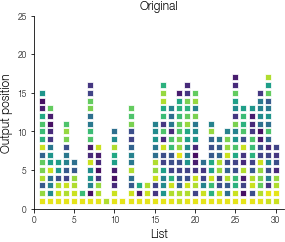

In [49]:
g = fr.plot_raster(fr.reset_list(sim_merged), length=4);
g.ax.set_title('Original');

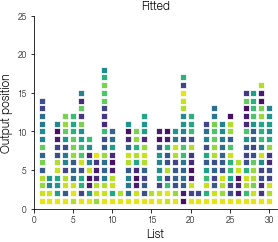

In [50]:
g = fr.plot_raster(fr.reset_list(fit_merged), length=4);
g.ax.set_title('Fitted');

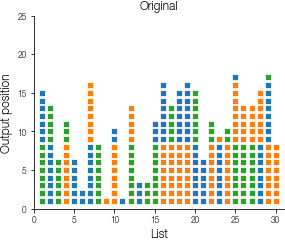

In [51]:
g = fr.plot_raster(fr.reset_list(sim_merged), hue='category', length=4);
g.ax.set_title('Original');

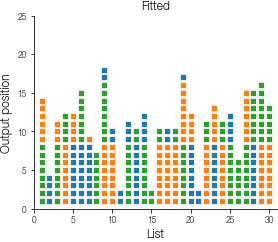

In [52]:
g = fr.plot_raster(fr.reset_list(fit_merged), hue='category', length=4);
g.ax.set_title('Fitted');

## Compare original and fitted parameters

In [53]:
results.loc[(1, 0)]
pd.DataFrame({'orig': pd.Series(param), 'fit': results.loc[(1, 0)]})

,orig,fit
Acf,0.0000,0.000000
Afc,0.0000,0.000000
Aff,0.0000,0.000000
B_enc,0.7500,0.702929
B_rec,0.9500,0.955761
B_start,0.8700,0.500661
Dcf,0.9200,0.827550
Dfc,0.8400,0.791141
Dff,2.0000,5.158620
Lcf,0.0800,0.172450
